In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

### 1. 데이터 불러오기 

In [4]:
df = pd.read_excel('data/시도별 전출입 인구수.xlsx')

In [5]:
# 데이터 확인
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    19 non-null     object
 1   전입지별    325 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    325 non-null    object
 17  1985    325 non-null    object
 18  1986    325 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [6]:
df.size
df.shape

(325, 50)

### 2. 결측치 처리

In [7]:
# ffill 사용
df.fillna(method = 'ffill', inplace = True)
df.tail(10)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
315,제주특별자치도,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,58,74,134,188,210,255
316,제주특별자치도,경기도,727,817,420,641,702,1811,1351,1516,...,5223,5046,5022,4990,4655,4775,5291,5845,6520,6931
317,제주특별자치도,강원도,435,191,150,184,194,728,295,306,...,570,582,542,516,520,511,543,607,694,693
318,제주특별자치도,충청북도,42,59,116,82,115,185,205,128,...,519,475,478,518,484,433,546,621,726,754
319,제주특별자치도,충청남도,294,155,238,235,285,554,493,535,...,731,756,774,776,696,676,757,896,834,967
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,제주특별자치도,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


### 3. 지역별 전출 데이터 추출 

In [8]:
# 서울에서 다른 지역으로 전출하는 데이터 추출
df_seoul = df[(df.전출지별 == '서울특별시') & (df.전입지별 != '서울특별시')]
df_seoul = df_seoul.drop(['전출지별'], axis=1)

In [9]:
df_seoul

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


### 4. 전입지 기준 데이터 선택

In [10]:
# [전입지별] 이름 변경
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [11]:
# 인덱스를 [전입지]로 변경
df_seoul.set_index('전입지', inplace=True)

In [12]:
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


### 5. 전입지별 데이터 추출 

In [13]:
# 경기도 추출
sr_one = df_seoul.loc['경기도']
sr_one #서울에서 경기도로 이동한 인구 데이터 

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

### 6. plot 함수 이용해서 그래프 만들기

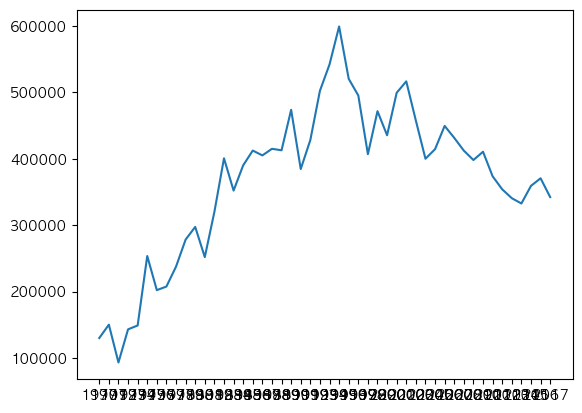

In [14]:
# 시리즈의 인덱스를 x축 데이터로, 데이터값을 y축 데이터로 
x = sr_one.index
y = sr_one.values
plt.plot(x,y)
plt.show()

###### 6-1. 차트 제목, 축 이름 추가

Text(0, 0.5, '이동 인구 수')

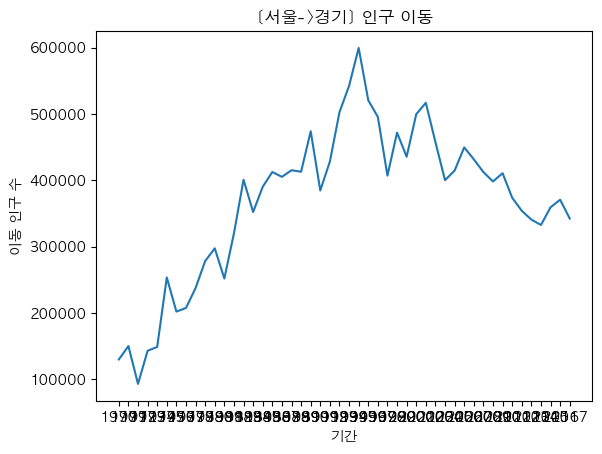

In [15]:
plt.plot(x,y)
plt.title('[서울->경기] 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')

###### 6-2. 그래프 꾸미기

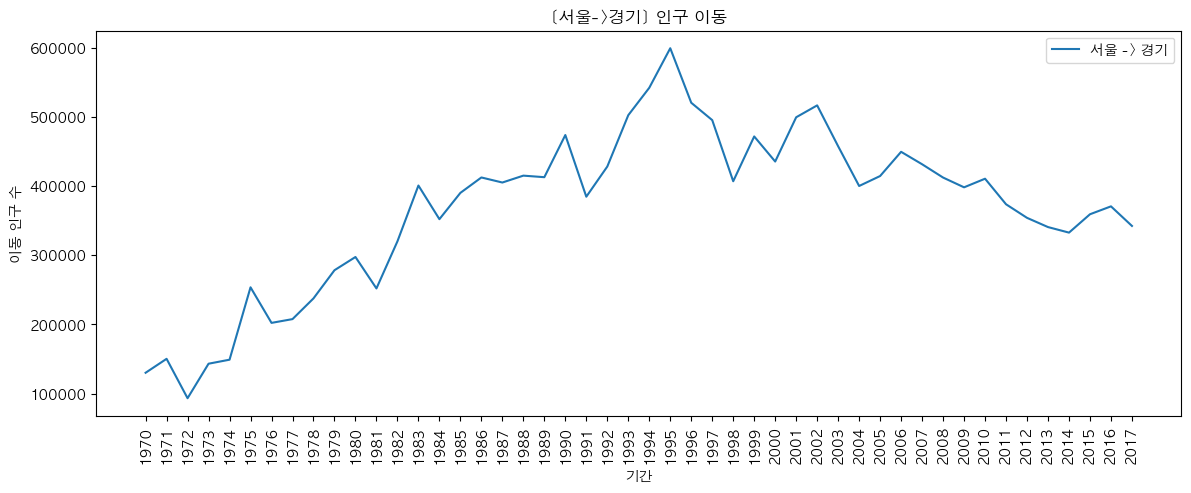

In [16]:
plt.figure(figsize=(14,5)) # figsize 변경
plt.plot(x,y)
plt.title('[서울->경기] 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.xticks(rotation = 90) #눈금 라벨 변경
plt.legend(labels = ['서울 -> 경기'], loc = 'upper right') # 범례 표시
plt.show()

###### 6-3. matplolib의 스타일 서식 지정  (색, 폰트 등 디자인적 요소 변경) 

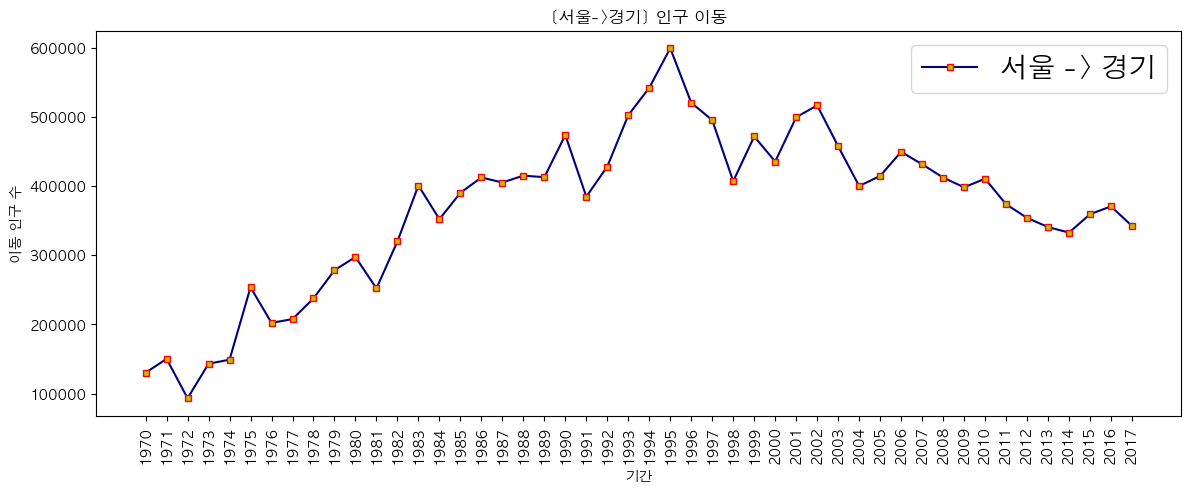

In [17]:
# 그래프, 라벨 서식 변경 (색, 폰트 사이즈 등)
plt.figure(figsize=(14,5)) 
plt.plot(x,y, c = 'navy', 
         marker = 's', 
         markersize=5,
        mec='r',
        mfc='y') #그래프 서식 변경(색깔, marker 모양, marker 크기, marker 색)
plt.title('[서울->경기] 인구 이동')
plt.xlabel('기간', size=10) #라벨 서식 변경
plt.ylabel('이동 인구 수', size=10)
plt.xticks(rotation = 90, size = 10) 
plt.legend(labels = ['서울 -> 경기'], loc = 'upper right', fontsize=20) #범례 표시 서식 변경
plt.show()

###### 6-4. 그래프 설명 달기 

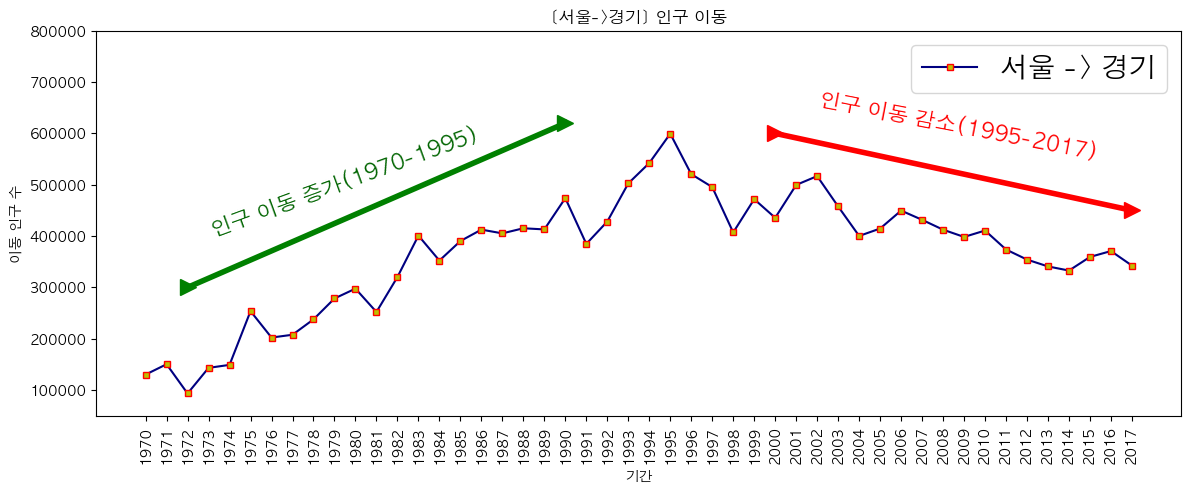

In [66]:
plt.figure(figsize=(14,5)) 
plt.plot(x,y, c = 'navy', 
         marker = 's', 
         markersize=5,
        mec='r',
        mfc='y') 
plt.title('[서울->경기] 인구 이동')
plt.xlabel('기간', size=10) #라벨 서식 변경
plt.ylabel('이동 인구 수', size=10)
plt.xticks(rotation = 90, size = 10) 
plt.legend(labels = ['서울 -> 경기'], loc = 'upper right', fontsize=20)

plt.ylim(50000, 800000) #주석 넣을 공간 확보
x1 = [x[2], x[20]]
y1 = [300000, 620000]
plt.plot(x1,y1,'g->', lw=4, markersize = 12)
plt.text(3, 400000, '인구 이동 증가(1970-1995)', 
         color = 'darkgreen', size =15, rotation=20)


x2 = [x[30], x[-1]]
y2 = [600000, 450000]
plt.plot(x2,y2,'r->', lw=4, markersize = 12)
plt.text(32, 550000, '인구 이동 감소(1995-2017)', 
         color = 'r', size =15, rotation=-11)

plt.show()

###### 6-5. 그래프 여러개 그리기 

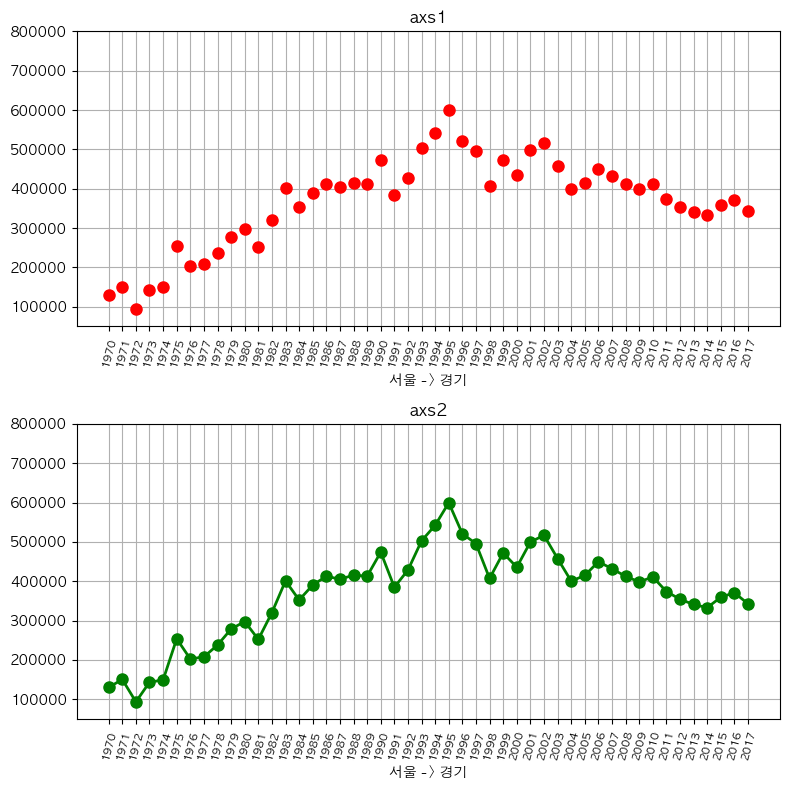

In [133]:
#subplot 사용
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(x,y, 'ro', markersize = 8)
plt.xlabel('서울 -> 경기')
plt.title('axs1')
plt.ylim(50000, 800000)
plt.xticks(rotation=75, size=8)
plt.grid()

plt.subplot(2,1,2)
plt.plot(x,y, 'g-o', lw=2, markersize = 8)
plt.xlabel('서울 -> 경기')
plt.title('axs2')
plt.ylim(50000, 800000)
plt.xticks(rotation=75, size=8)
plt.tight_layout() #그래프 겹치지 않도록
plt.grid()
plt.show()

### 7. 경기도 외 지역 그래프 추가

In [104]:
sr2 = df_seoul.loc['경상남도']
sr2

1970     8409
1971    10001
1972    11263
1973    15193
1974    16771
1975    23150
1976    22400
1977    27393
1978    28697
1979    30183
1980    29205
1981    28795
1982    28250
1983    30485
1984    27988
1985    25792
1986    26002
1987    26970
1988    26801
1989    24189
1990    24216
1991    21999
1992    21546
1993    19398
1994    17887
1995    19306
1996    19061
1997    12855
1998    13340
1999    13690
2000    11741
2001    12100
2002    12290
2003    13827
2004    12973
2005    14076
2006    14510
2007    16015
2008    15438
2009    15303
2010    15689
2011    16039
2012    14474
2013    14447
2014    14799
2015    15220
2016    13717
2017    12692
Name: 경상남도, dtype: object

In [105]:
sr3 = df_seoul.loc['제주특별자치도']
sr3

1970     1039
1971     1325
1972     1617
1973     2456
1974     2261
1975     3440
1976     3623
1977     3551
1978     3937
1979     4261
1980     4828
1981     5229
1982     5276
1983     6373
1984     5671
1985     5445
1986     5123
1987     5330
1988     5627
1989     5894
1990     6364
1991     6319
1992     5829
1993     5014
1994     4536
1995     5256
1996     5413
1997     5500
1998     6207
1999     6171
2000     5198
2001     5186
2002     5567
2003     5458
2004     5695
2005     5648
2006     5828
2007     5518
2008     5473
2009     5332
2010     5714
2011     6133
2012     6954
2013     7828
2014     9031
2015    10434
2016    10465
2017    10404
Name: 제주특별자치도, dtype: object

In [125]:
sr4 = df_seoul.loc['강원도']
sr4

1970     9352
1971    12885
1972    13561
1973    16481
1974    15479
1975    27837
1976    25927
1977    25415
1978    26700
1979    27599
1980    32858
1981    32116
1982    31013
1983    31308
1984    30470
1985    29911
1986    28489
1987    28699
1988    26691
1989    26394
1990    26591
1991    25208
1992    25215
1993    23244
1994    21384
1995    24987
1996    25221
1997    25178
1998    25840
1999    25741
2000    22832
2001    22941
2002    21582
2003    21696
2004    22071
2005    20483
2006    21969
2007    22177
2008    23668
2009    23331
2010    22736
2011    23624
2012    22332
2013    20601
2014    21173
2015    22659
2016    21590
2017    21016
Name: 강원도, dtype: object

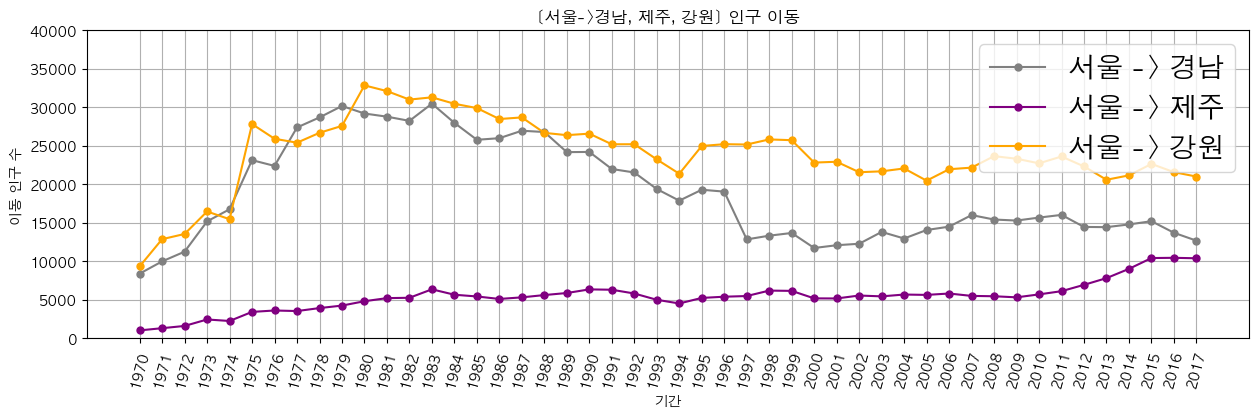

In [129]:
x1 = sr2.index
y1 = sr2.values

x2 = sr3.index
y2 = sr3.values

x3 = sr4.index
y3 = sr4.values


plt.figure(figsize=(15,4))
plt.plot(x1, y1, c='gray',
         marker = 'o',
         markersize = 5, 
        mec = 'gray',
        mfc = 'gray')

plt.plot(x2, y2, c='purple',
         marker = 'o',
         markersize = 5, 
        mec = 'purple',
        mfc = 'purple')


plt.plot(x3, y3, c='orange',
         marker = 'o',
         markersize = 5, 
        mec = 'orange',
        mfc = 'orange')
plt.ylim(0,40000)

plt.title('[서울->경남, 제주, 강원] 인구 이동')
plt.xlabel('기간', size=10) 
plt.ylabel('이동 인구 수', size=10)
plt.xticks(rotation = 75, size = 10) 
plt.legend(labels = ['서울 -> 경남', '서울 -> 제주', '서울 -> 강원'], loc = 'upper right', fontsize=20)
plt.grid()
plt.show()